In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler

import os

In [9]:
ROADS = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']
ROADS_DRYWET = ['A. Maceda DRY', 'A. Maceda WET', 'Anda Circle DRY', 'Anda Circle WET','Antipolo DRY','Antipolo WET',
         'Bluementritt DRY', 'Bluementritt WET','Buendia DRY','Buendia WET', 'Edsa Extension DRY', 'Edsa Extension WET', 'Finance Road DRY', 'Finance Road WET', 
         'Gov. Forbes - Lacson DRY','Gov. Forbes - Lacson WET', 'Lerma DRY', 'Lerma WET', 'Magsaysay Ave DRY', 'Magsaysay Ave WET', 'P.Noval DRY', 'P.Noval WET', 'Pablo Ocampo DRY', 'Pablo Ocampo WET', 'Pedro Gil DRY', 'Pedro Gil WET',  
         'Quezon Ave. DRY','Quezon Ave. WET', 'Quirino DRY', 'Quirino WET', 'Rajah Sulayman DRY', 'Rajah Sulayman WET', 'Taft Ave. DRY', 'Taft Ave. WET', 'U.N. Avenue DRY', 'U.N. Avenue WET',
         'Vicente Cruz DRY', 'Vicente Cruz WET']

YEAR = "2015"
EXT = ".csv"

PATH = "D:\\COLLEGE\\THESIS\Feature Engineering\\FeatureEngineering_TimeSeries\\normalized_merged\\"

DATA_COND = "normalized_mmda_wwo_2015\\"


In [3]:
def getAllHighCorr(LIST):
    y_max = max(LIST)
    y_min =  min(LIST)
    max_index = 0
    if(y_max > abs(y_min)):
        max_index = LIST.index(y_max)
    else:
        max_index = LIST.index(y_min)
    return max_index

In [10]:
def removePeakHours(df):
    result_df = df.copy()
    result_df['peak_hour'] = 0

    # Set morning peak hour

    start = datetime.time(7,0,0)
    end = datetime.time(10,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1

    # Set afternoon peak hour

    start = datetime.time(16,0,0)
    end = datetime.time(19,0,0)

    result_df.loc[result_df.between_time(start, end).index, 'peak_hour'] = 1
    
    IS_PEAKHOUR = 1

    # Filter based on parameters
    work_day_peak_hour_df = result_df[result_df['peak_hour'] != IS_PEAKHOUR]

    # Remove work_day and peak_hour columns
    work_day_peak_hour_df.drop(['peak_hour'], axis=1, inplace=True)
    
    return work_day_peak_hour_df

In [1]:
##For Mavic only


dataset = pd.read_csv(PATH + DATA_COND + "VC_july7-14.csv", skipinitialspace = True, encoding = "ISO-8859-1")
variable = "precipMM"
dataset[variable + '_t-10'] = dataset[variable].shift(10)
dataset[variable + '_t-9'] = dataset[variable].shift(9)
dataset[variable + '_t-8'] = dataset[variable].shift(8)
dataset[variable + '_t-7'] = dataset[variable].shift(7)
dataset[variable + '_t-6'] = dataset[variable].shift(6)
dataset[variable + '_t-5'] = dataset[variable].shift(5)
dataset[variable + '_t-4'] = dataset[variable].shift(4)
dataset[variable + '_t-3'] = dataset[variable].shift(3)
dataset[variable + '_t-2'] = dataset[variable].shift(2)
dataset[variable + '_t-1'] = dataset[variable].shift(1)

#Expanding Part
expandingWindow = dataset[variable].expanding()

expandingMeans = expandingWindow.mean()
expandingMins = expandingWindow.min()
expandingMaxs = expandingWindow.max()
expandingSum = expandingWindow.sum()
dataset[variable + '_Emean'] = expandingMeans
dataset[variable + '_Emin'] = expandingMins
dataset[variable + '_Emax'] = expandingMaxs
dataset[variable + '_Esum'] = expandingSum

# Rolling Window Features window 9 = 2hrs

rolllingWidth = 8
rolllingWindow = dataset[variable + '_t-7'].rolling(window=rolllingWidth)
rollingMeans = rolllingWindow.mean()
rollingMins = rolllingWindow.min()
rollingMaxs = rolllingWindow.max()
rollingMaxs = rolllingWindow.sum()
dataset[variable + '_Rmean (window = 8)'] = rollingMeans
dataset[variable + '_Rmin  (window = 8)'] = rollingMins
dataset[variable + '_Rmax  (window = 8)'] = rollingMaxs



# ensure is datetime
dataset.index = pd.to_datetime(dataset.index)
dataset = removePeakHours(dataset)

dataset.to_csv(PATH + DATA_COND + "OGData VC_july7-14.csv", encoding='utf-8', index=False)

# # dataset.head()
# correlation = dataset.corr(method='spearman')

# # correlation = pd.concat([correlation,FEATURES], axis = 1)
# correlation.to_csv(PATH + DATA_COND + "Corr VC_SEPT10-14.csv", encoding='utf-8', index=False)


NameError: name 'pd' is not defined

## SeasonDryWet - NoExpanding NORTHBOUND

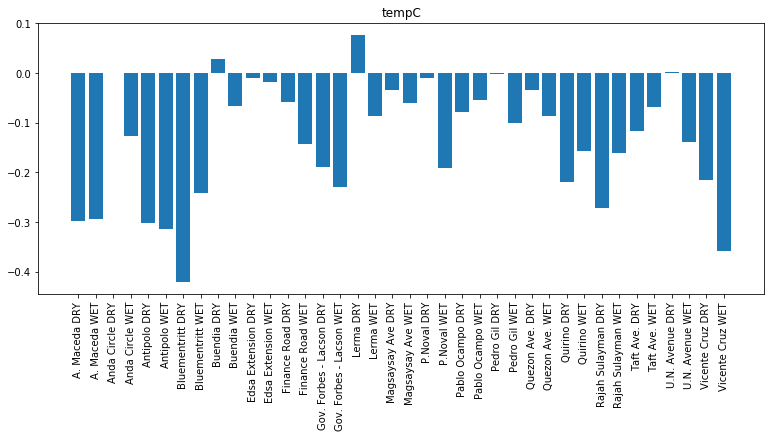

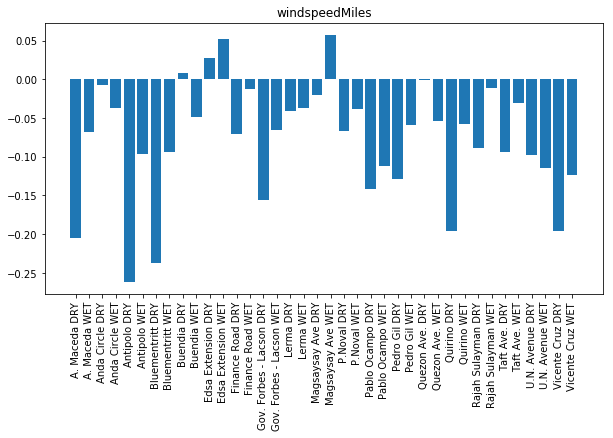

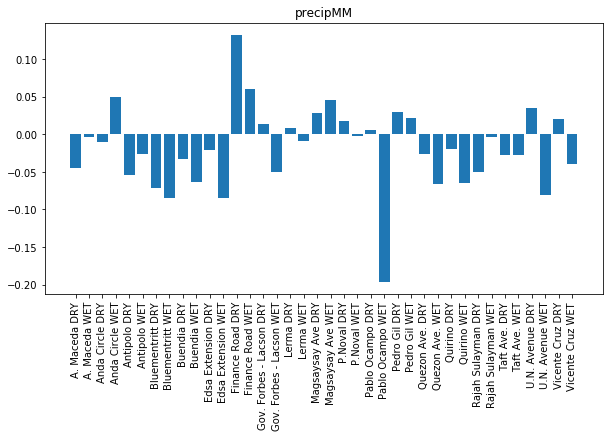

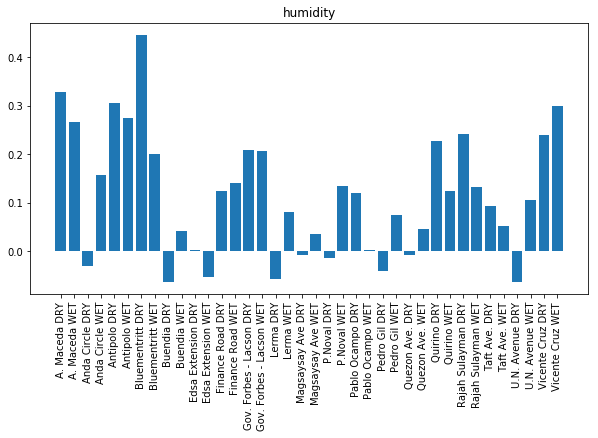

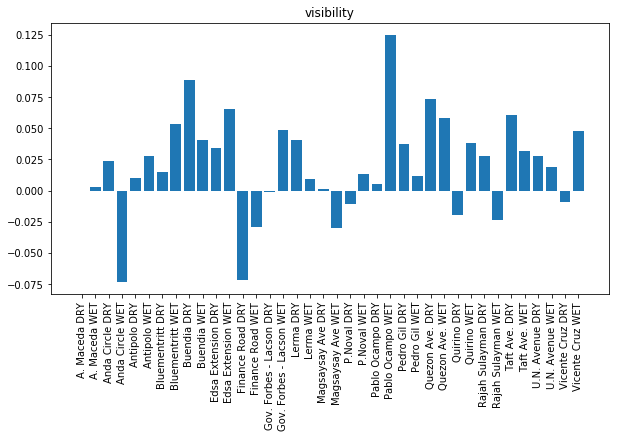

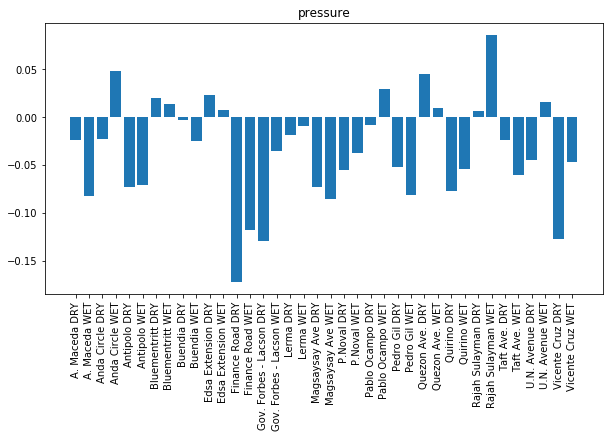

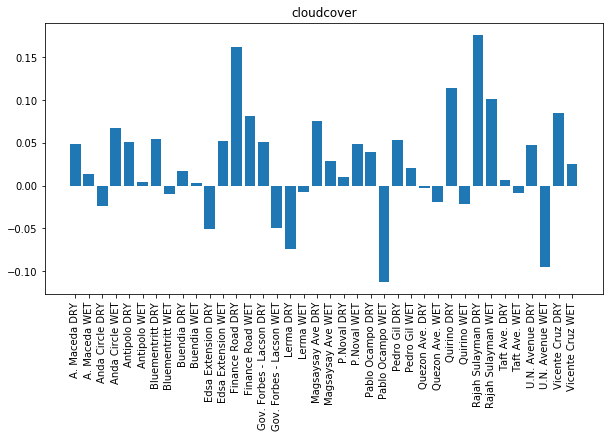

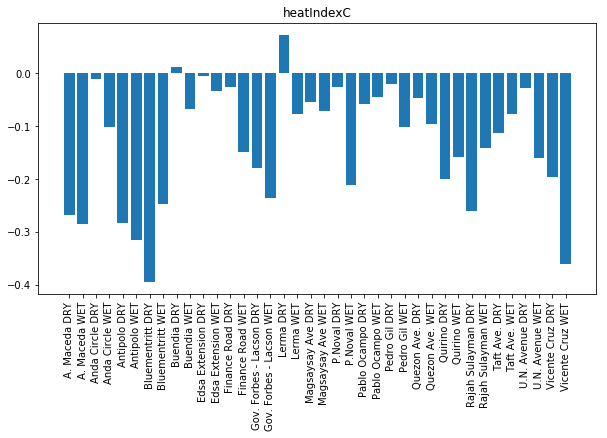

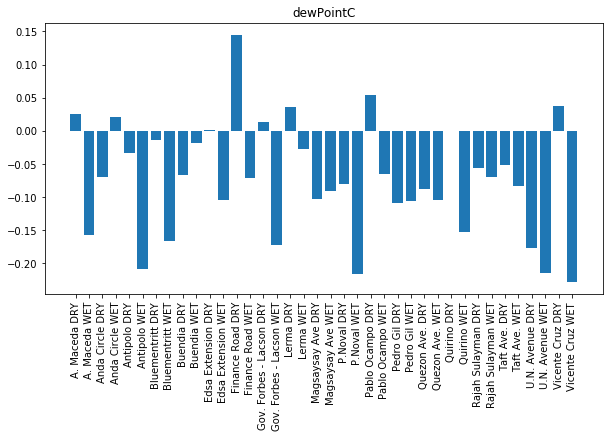

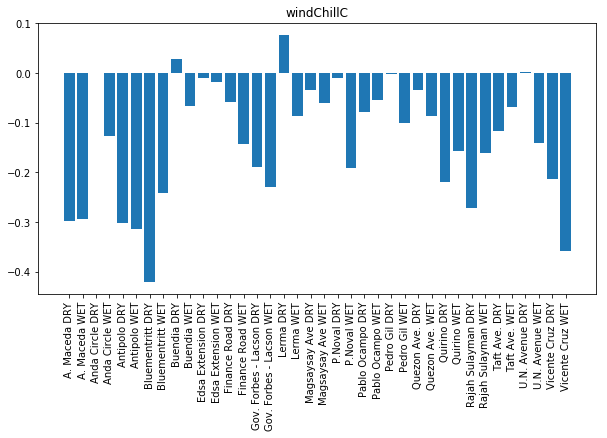

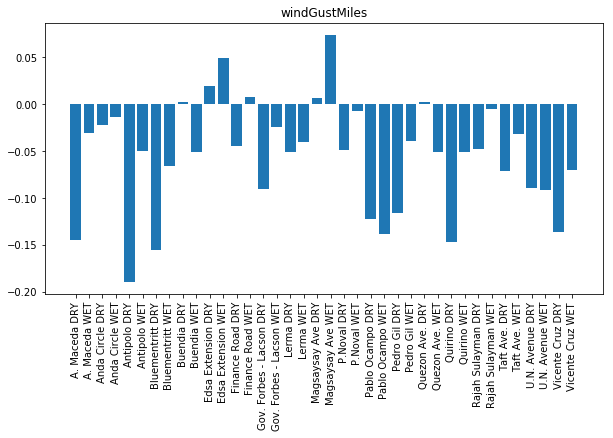

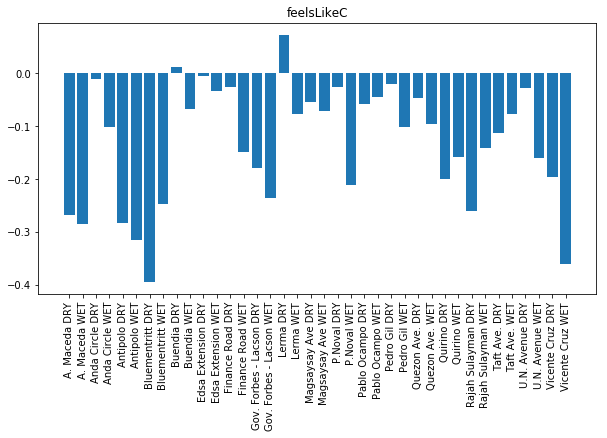

In [33]:
y = []
for f in range(2, 14): 
    y = []
    for file in os.listdir(PATH + DATA_COND): 
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = sample_dataset.columns
        y.append(dataset[FEATURES[f]][0])
    
    plt.bar(ROADS_DRYWET, y)
    plt.title(FEATURES[f])
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = 10,5
    plt.show()
    

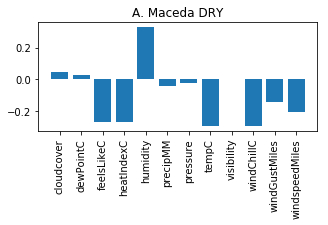

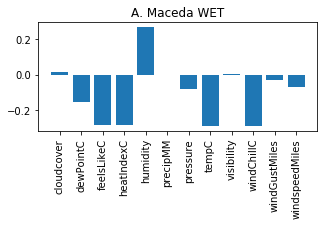

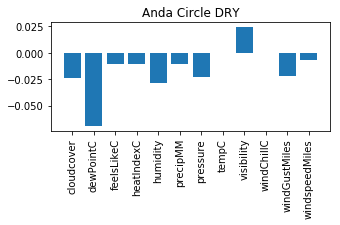

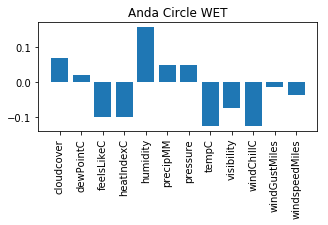

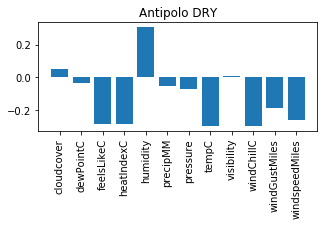

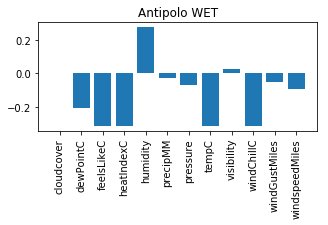

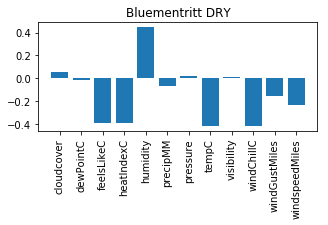

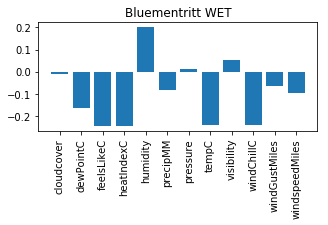

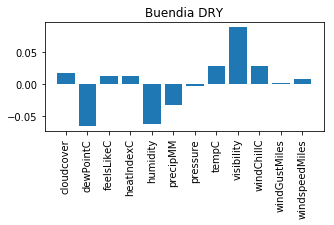

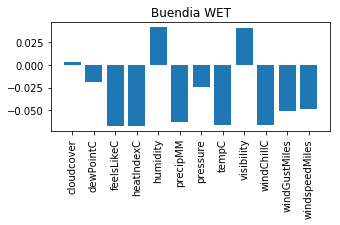

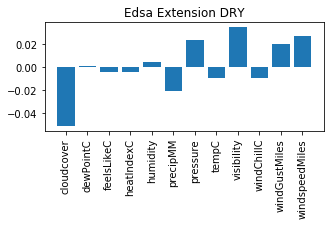

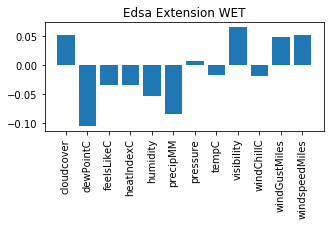

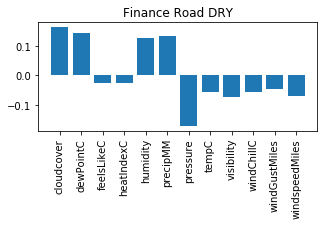

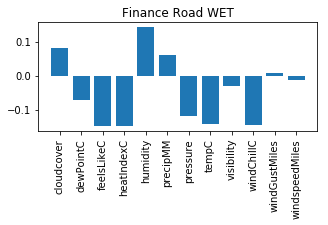

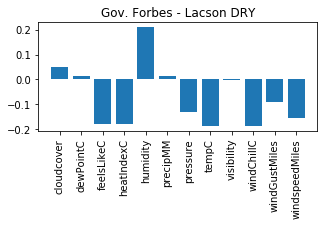

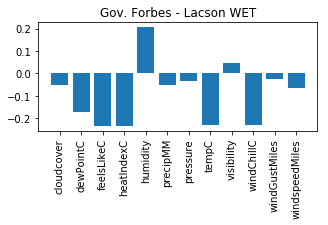

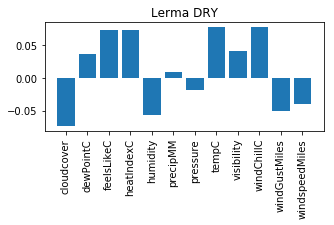

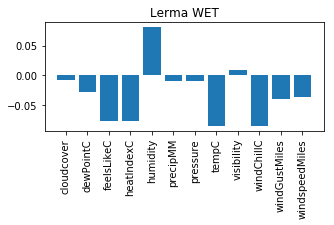

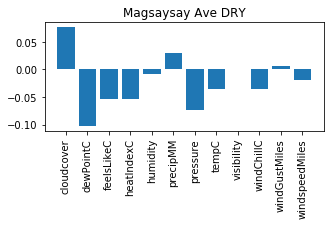

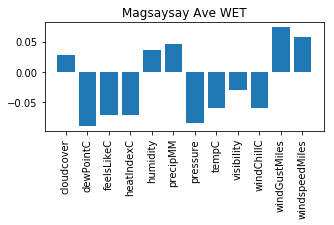

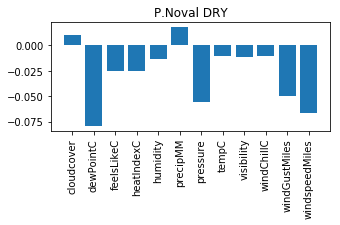

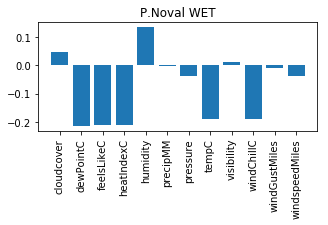

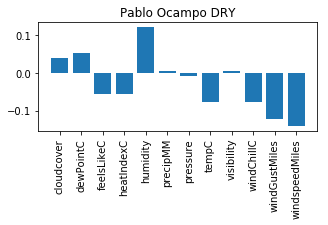

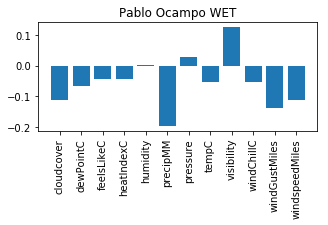

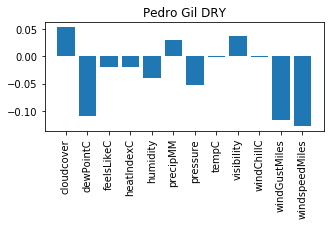

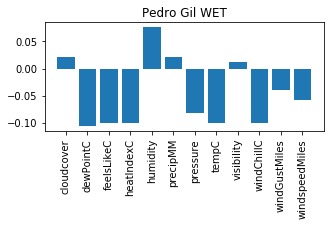

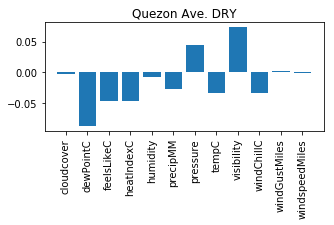

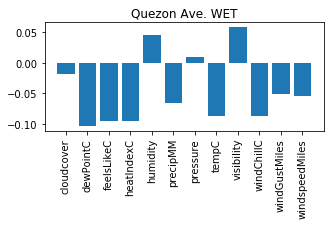

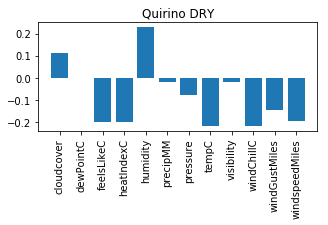

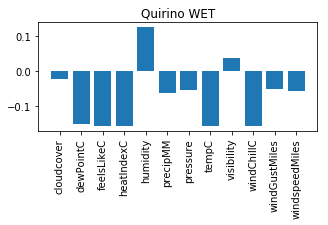

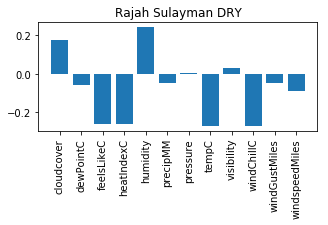

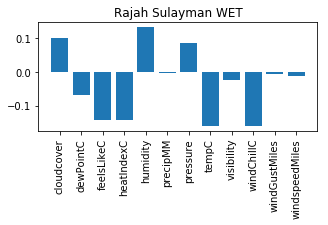

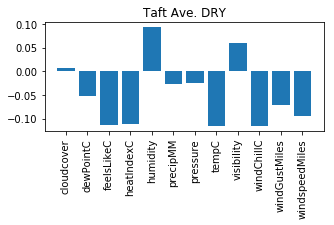

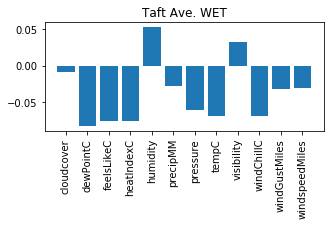

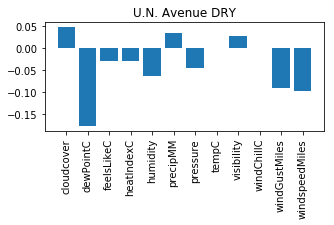

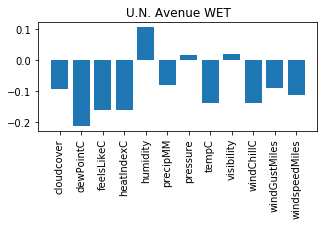

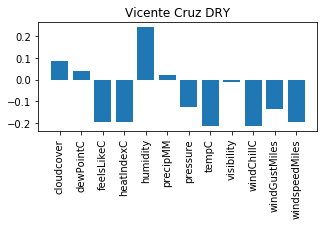

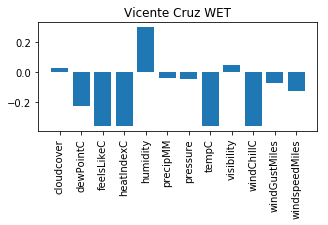

In [45]:
y = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
    FEATURES = sample_dataset.columns
    y = []
    for f in range(2, 14): 
        y.append(dataset[FEATURES[f]][0])
        
    plt.bar(FEATURES[2:14], y)
    plt.title(ROADS_DRYWET[ctr])
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = 5,2
    plt.show()
    ctr = ctr +1 
    

## Season Dry/Wet - NoExpanding NORTHBOUND

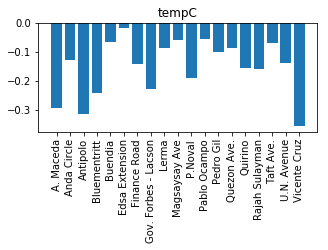

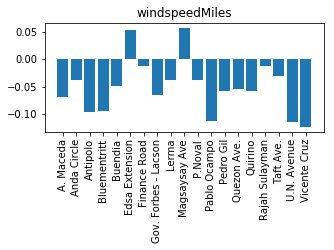

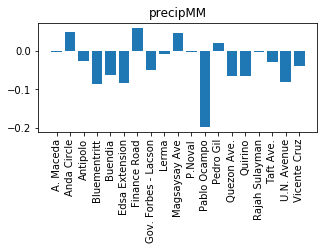

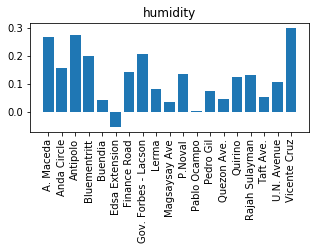

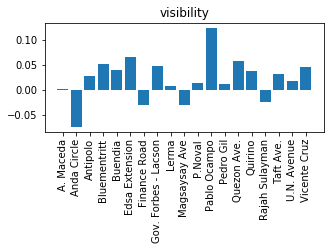

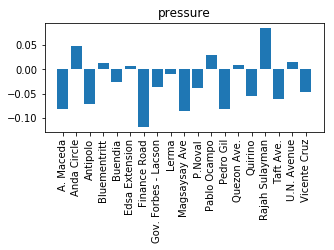

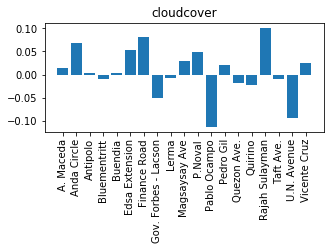

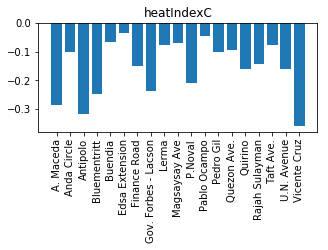

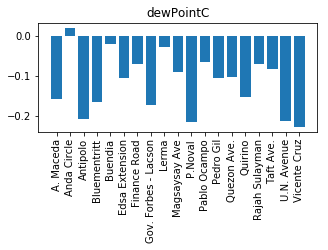

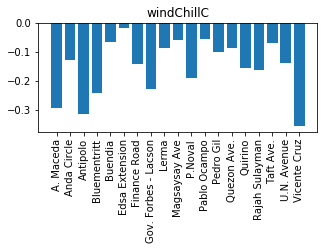

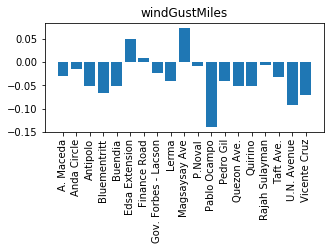

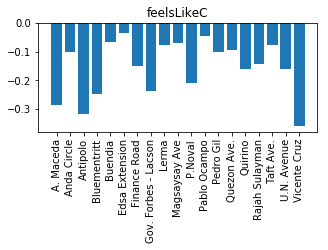

In [46]:
find = "Wet"
y = []
for f in range(2, 14): 
    y = []
    for file in os.listdir(PATH + DATA_COND): 
        if find in file: 
            dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
            FEATURES = sample_dataset.columns
            y.append(dataset[FEATURES[f]][0])
    
    plt.bar(ROADS, y)
    plt.title(FEATURES[f])
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = 5,2
    plt.show()

## SeasonDryWet - NoExpanding SOUTHBOUND

In [ ]:
y = []
for f in range(2, 14): 
    y = []
    for file in os.listdir(PATH + DATA_COND): 
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = sample_dataset.columns
        y.append(dataset[FEATURES[f]][1])
    
    plt.bar(ROADS_DRYWET, y)
    plt.title(FEATURES[f])
    plt.xticks(rotation='vertical')
#     plt.rcParams["figure.figsize"] = 13,5
    plt.show()
    

In [ ]:
y = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
    FEATURES = sample_dataset.columns
    y = []
    for f in range(2, 14): 
        y.append(dataset[FEATURES[f]][1])
        
    plt.bar(FEATURES[2:14], y)
    plt.title(ROADS_DRYWET[ctr])
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = 10,5
    plt.show()
    ctr = ctr +1 
    

## Season Dry/Wet - NoExpanding SOUTHBOUND

In [ ]:
find = "Wet"
y = []
for f in range(2, 14): 
    y = []
    for file in os.listdir(PATH + DATA_COND): 
        if find in file: 
            dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
            FEATURES = sample_dataset.columns
            y.append(dataset[FEATURES[f]][1])
    
    plt.bar(ROADS, y)
    plt.title(FEATURES[f])
    plt.xticks(rotation='vertical')
#     plt.rcParams["figure.figsize"] = 13,5
    plt.show()
    
    
    
    

<br><br><br><br>
# Expanding WET

In [8]:
WINDOWS = [2,3,4,8,12,16,24,48,96]

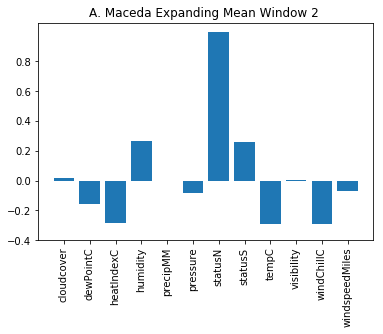

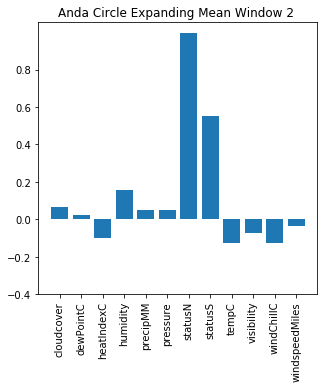

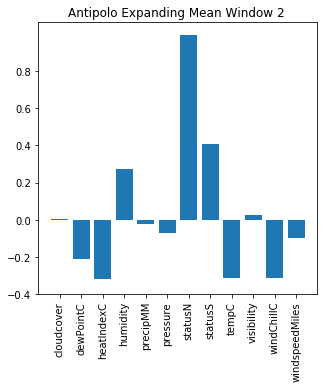

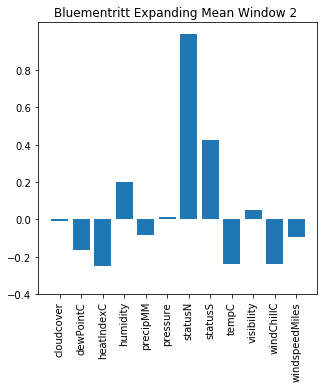

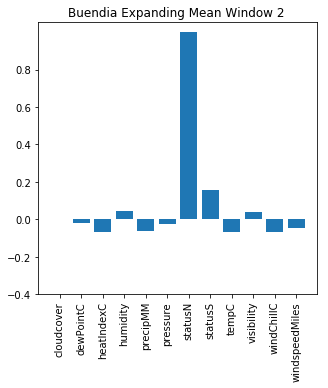

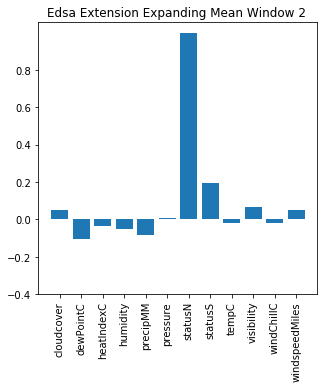

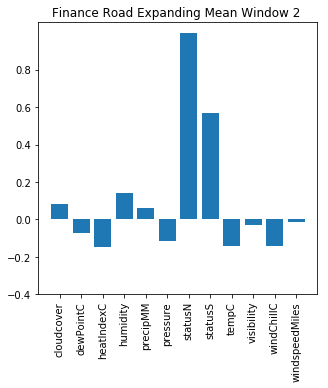

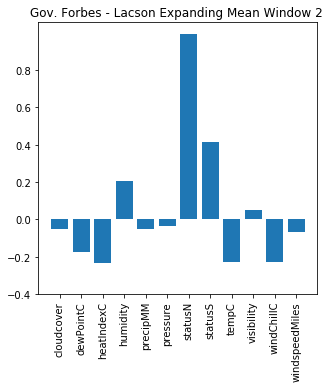

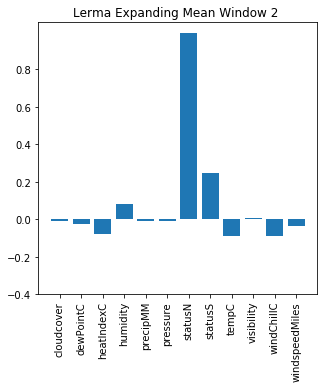

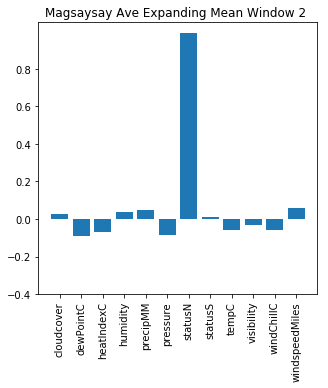

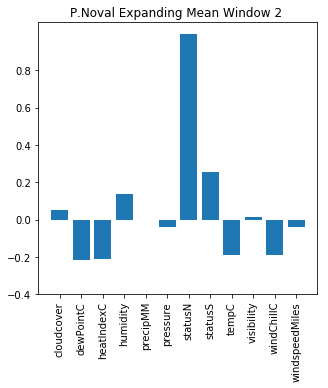

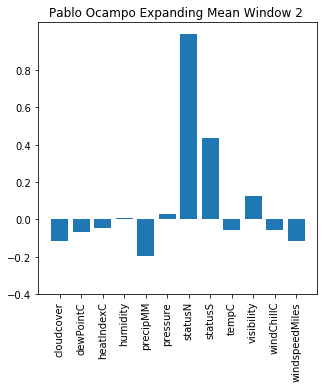

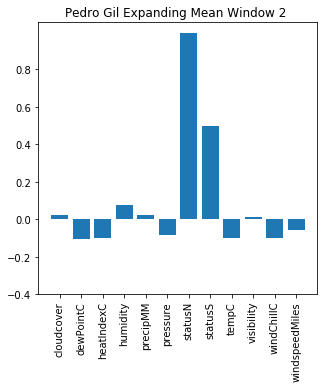

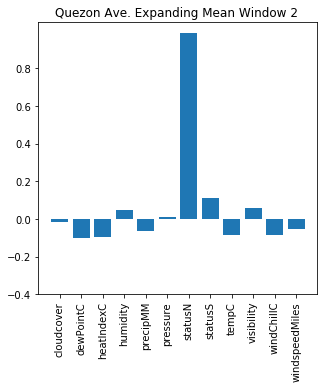

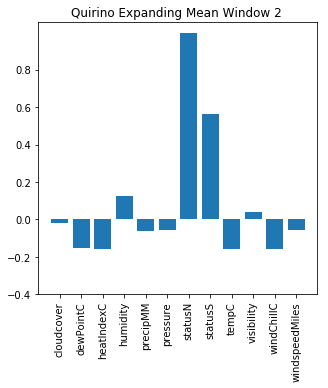

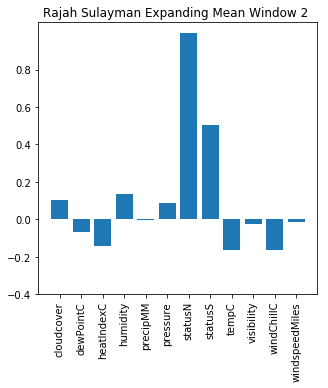

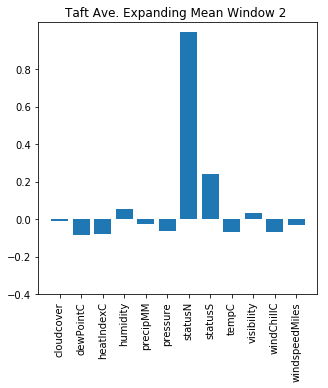

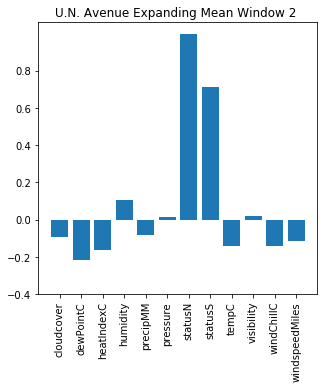

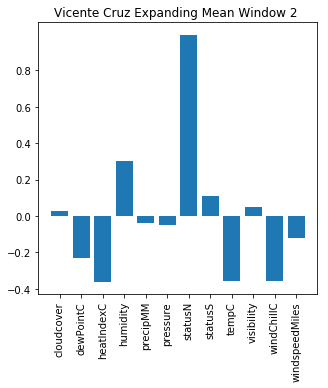

In [6]:
find = "Wet"
y = []
window = "2 "
STAT = "Expanding Mean "
COL = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    if find in file: 
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = dataset.columns
        y = []
        COL = []
        for f in range(13, len(FEATURES)): 
            if STAT+window in FEATURES[f]:
                y.append(dataset[FEATURES[f]][0])
                COL.append(FEATURES[f].replace(STAT + window, ""))

        plt.bar(COL, y)
        plt.title(ROADS[ctr] + " "  + STAT + "Window " + window)
        plt.xticks(rotation='vertical')
        plt.rcParams["figure.figsize"] = 5,5
        plt.yticks(np.arange(-0.4, 1, 0.2))
        plt.show()
        ctr = ctr +1 

<br>
<br><br>
### One road, all windows, all weather

CORRELATED_ENGINEER_normalized_mmda_wwo_Vicente Cruz_2015_seasonWet.csv
[2, 3, 4, 8, 12, 16, 24, 48, 96]
[0.99579756468606284, 0.11023143608909867, -0.35773338586256631, -0.12302174825446199, -0.039092202148977802, 0.30068287678920003, 0.047296234462712375, -0.047050960246833529, 0.02675240629634669, -0.36113560952148455, -0.22819706586179289, -0.35792986167595248]


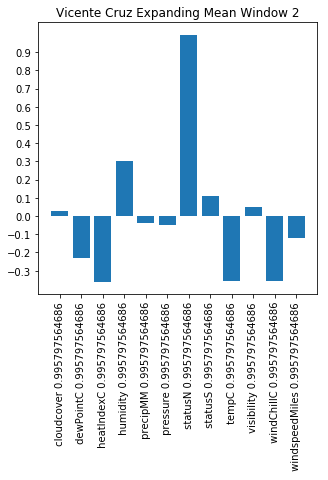

[0.98811820865441025, 0.11153811174801948, -0.35975003462089211, -0.12198953216375327, -0.036698588710658085, 0.30236014475265199, 0.046458263382542053, -0.045043336157173222, 0.027596096761423043, -0.363429090229484, -0.23142712312685235, -0.35996912832164868]


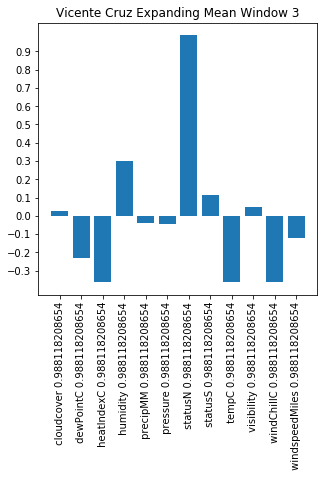

[0.9787879587754138, 0.10803510673580333, -0.35786653755532433, -0.12277086257620608, -0.03741988762924052, 0.30271549467158321, 0.047009977786832621, -0.046673868403074935, 0.028434283870717506, -0.3629846980632348, -0.22838125459077391, -0.35805584642724092]


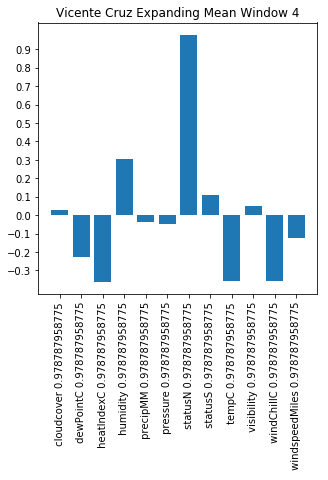

[0.93437747243533487, 0.10402117391851616, -0.3609118620741783, -0.11823444653413345, -0.02903547986527753, 0.30516992476492205, 0.044465178444108702, -0.041059755959694362, 0.032062276149186816, -0.36741063486007169, -0.22908066398643509, -0.36111635023159072]


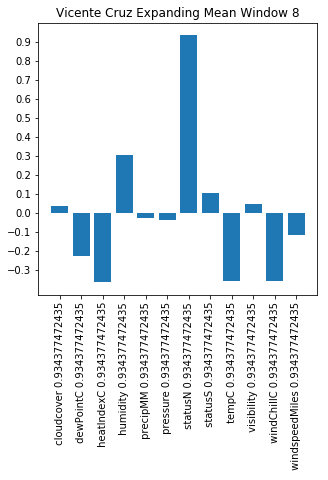

[0.90396710101634903, 0.099940598366921596, -0.36334773721040109, -0.1164664477312784, -0.025410660034908383, 0.30828064478813721, 0.043685294893008535, -0.038326470169116174, 0.034846056119649936, -0.3701328221562396, -0.23497020576181635, -0.36351316615359869]


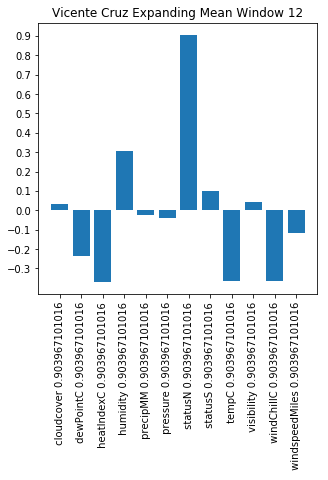

[0.86257385898914662, 0.096429379307130719, -0.35426679457504567, -0.11168881847016354, -0.023321750722746462, 0.30251419324054102, 0.03529604296917016, -0.035005401599351629, 0.037194057652698967, -0.36306632502947878, -0.21948796847570984, -0.35433167472136123]


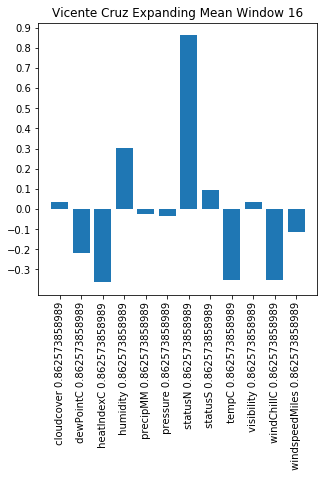

[0.84940366246426702, 0.096062554609753631, -0.37361697207094607, -0.10236195848203113, 0.0019222354706992012, 0.32086740304913802, 0.027743920520415199, -0.023264451293592472, 0.048122344170084937, -0.38556800956000969, -0.22698126008021374, -0.37380106408580777]


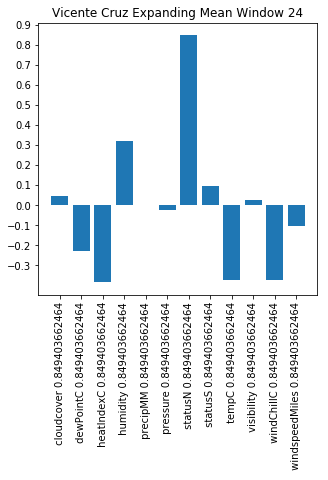

[0.70645702384105502, 0.10813964414504257, -0.3279686472652118, -0.10232510109328924, -0.017519954464191616, 0.29447970121865003, 0.051925440306562452, -0.01836809730872184, 0.049646645373255117, -0.33707865086039568, -0.17461631967353908, -0.32802473513172908]


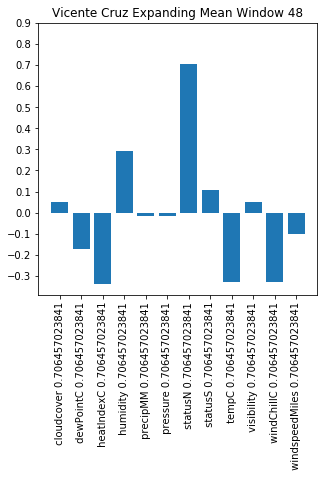

[0.64068864376473955, 0.15433431135906714, -0.2952282171004158, -0.022020013295458309, 0.0048113233970665387, 0.26536163997070339, 0.029634688770894417, -0.044347092405129247, 0.040929018316077717, -0.29989924158762321, -0.13340934905497509, -0.2951387629934531]


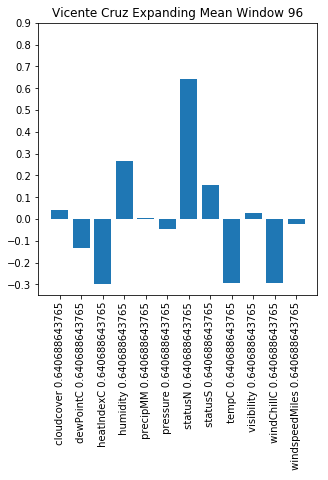

In [9]:
ROAD = ROADS[18]
find = "_2015_seasonWet"
y = []
STAT = "Expanding Mean "
COL = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    if ROAD + find in file: 
        print(file)
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = dataset.columns
        y = []
        COL = []
        print(WINDOWS)
        for EM in WINDOWS:
            y = []
            COL = []
            for f in range(13, len(FEATURES)): 
                ctr = 0
                if STAT+ str(EM) + " " in FEATURES[f]:
                    y.append(dataset[FEATURES[f]][0])
                    COL.append(FEATURES[f].replace(STAT + str(EM), "") + " " + str(y[ctr]))
                    ctr = ctr +1 
            print(y)
            plt.bar(COL, y)
            plt.title(ROAD + " "  + STAT + "Window " + str(EM))
            plt.xticks(rotation='vertical')
            plt.rcParams["figure.figsize"] = 5,5
            plt.yticks(np.arange(-0.3, 1, 0.1))
            plt.show()

In [ ]:
ROAD = ROADS[18]
find = "_2015_seasonWet"
y = []
STAT = "Expanding Mean "
COL = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    if ROAD + find in file: 
        print(file)
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = dataset.columns
        y = []
        COL = []
        print(WINDOWS)
        for EM in WINDOWS:
            y = []
            COL = []
            for f in range(13, len(FEATURES)): 
                ctr = 0
                if STAT+ str(EM) + " " in FEATURES[f]:
                    y.append(dataset[FEATURES[f]][0])
                    COL.append(FEATURES[f].replace(STAT + str(EM), "") + " " + str(y[ctr]))
                    ctr = ctr +1 
            print(y)
            plt.bar(COL, y)
            plt.title(ROAD + " "  + STAT + "Window " + str(EM))
            plt.xticks(rotation='vertical')
            plt.rcParams["figure.figsize"] = 5,5
            plt.yticks(np.arange(-0.3, 1, 0.1))
            plt.show()

###  One Road, Per Weather, All Windows

CORRELATED_ENGINEER_normalized_mmda_wwo_Vicente Cruz_2015_seasonWet.csv
[2, 3, 4, 8, 12, 16, 24, 48, 96]
[0.99579756468606284, 0.98811820865441025, 0.9787879587754138, 0.93437747243533487, 0.90396710101634903, 0.86257385898914662, 0.84940366246426702, 0.70645702384105502, 0.64068864376473955]


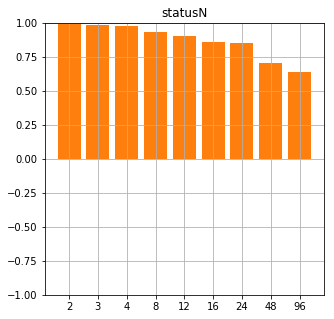

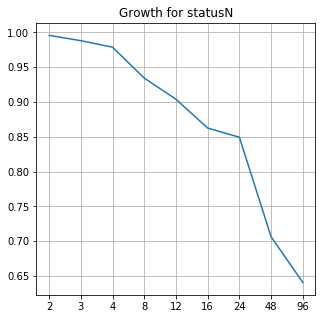

[0.11023143608909867, 0.11153811174801948, 0.10803510673580333, 0.10402117391851616, 0.099940598366921596, 0.096429379307130719, 0.096062554609753631, 0.10813964414504257, 0.15433431135906714]


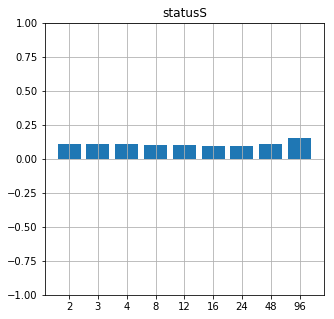

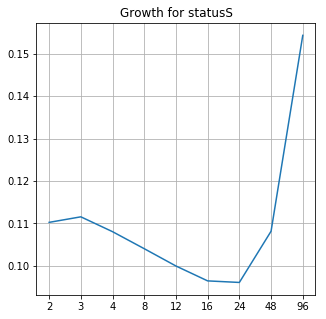

[-0.35773338586256631, -0.35975003462089211, -0.35786653755532433, -0.3609118620741783, -0.36334773721040109, -0.35426679457504567, -0.37361697207094607, -0.3279686472652118, -0.2952282171004158]


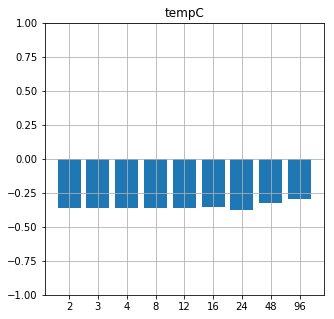

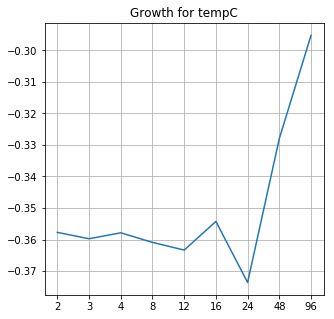

[-0.12302174825446199, -0.12198953216375327, -0.12277086257620608, -0.11823444653413345, -0.1164664477312784, -0.11168881847016354, -0.10236195848203113, -0.10232510109328924, -0.022020013295458309]


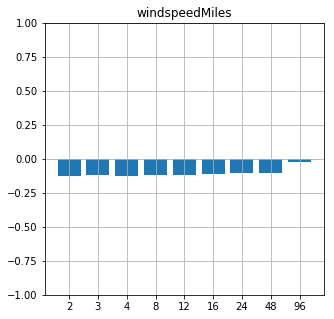

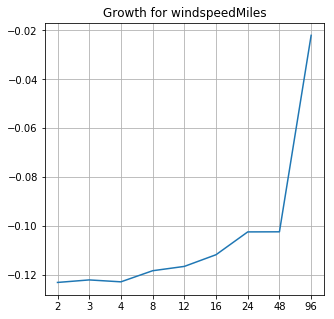

[-0.039092202148977802, -0.036698588710658085, -0.03741988762924052, -0.02903547986527753, -0.025410660034908383, -0.023321750722746462, 0.0019222354706992012, -0.017519954464191616, 0.0048113233970665387]


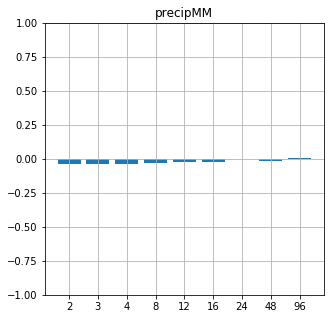

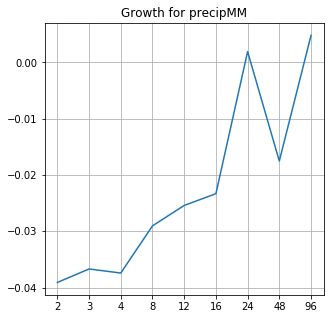

[0.30068287678920003, 0.30236014475265199, 0.30271549467158321, 0.30516992476492205, 0.30828064478813721, 0.30251419324054102, 0.32086740304913802, 0.29447970121865003, 0.26536163997070339]


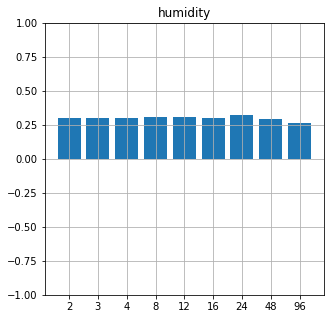

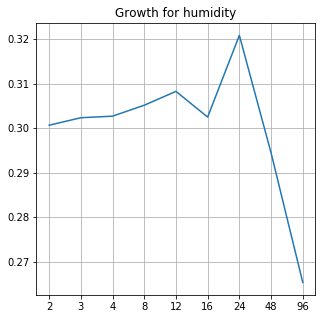

[0.047296234462712375, 0.046458263382542053, 0.047009977786832621, 0.044465178444108702, 0.043685294893008535, 0.03529604296917016, 0.027743920520415199, 0.051925440306562452, 0.029634688770894417]


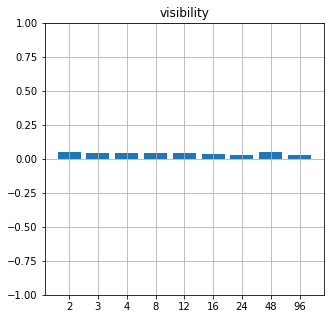

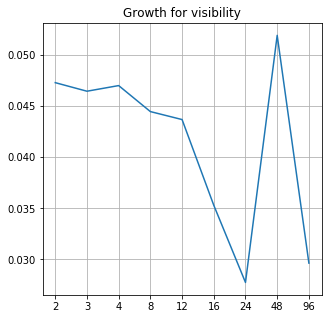

[-0.047050960246833529, -0.045043336157173222, -0.046673868403074935, -0.041059755959694362, -0.038326470169116174, -0.035005401599351629, -0.023264451293592472, -0.01836809730872184, -0.044347092405129247]


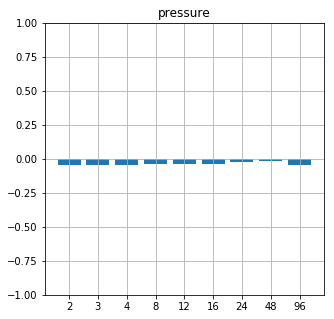

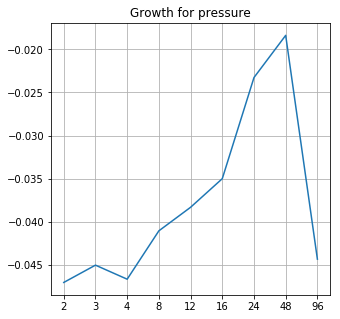

[0.02675240629634669, 0.027596096761423043, 0.028434283870717506, 0.032062276149186816, 0.034846056119649936, 0.037194057652698967, 0.048122344170084937, 0.049646645373255117, 0.040929018316077717]


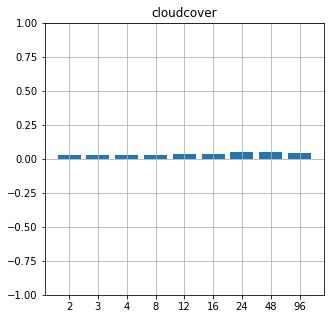

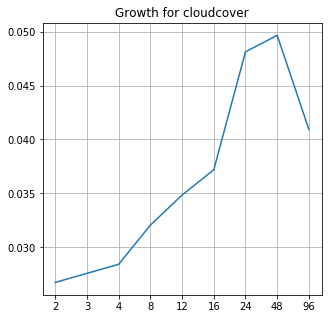

[-0.36113560952148455, -0.363429090229484, -0.3629846980632348, -0.36741063486007169, -0.3701328221562396, -0.36306632502947878, -0.38556800956000969, -0.33707865086039568, -0.29989924158762321]


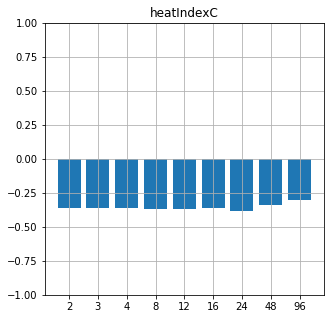

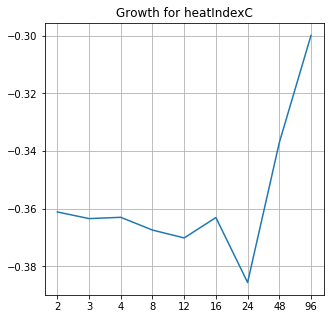

[-0.22819706586179289, -0.23142712312685235, -0.22838125459077391, -0.22908066398643509, -0.23497020576181635, -0.21948796847570984, -0.22698126008021374, -0.17461631967353908, -0.13340934905497509]


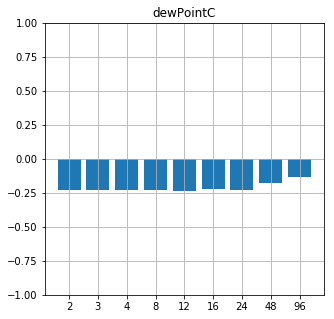

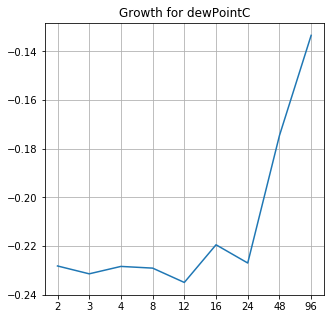

[-0.35792986167595248, -0.35996912832164868, -0.35805584642724092, -0.36111635023159072, -0.36351316615359869, -0.35433167472136123, -0.37380106408580777, -0.32802473513172908, -0.2951387629934531]


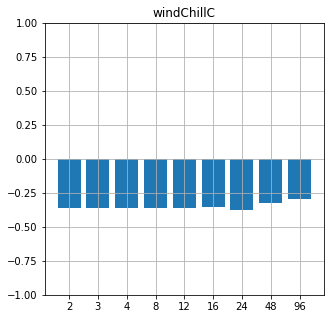

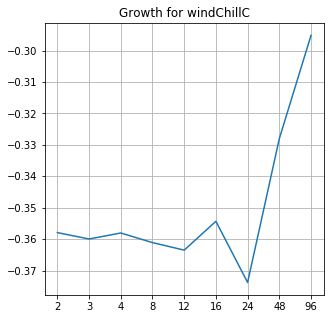

[]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [14]:
ROAD = ROADS[18]
find = "_2015_seasonWet"
y = []
STAT = "Expanding Mean "
COL = []
ctr = 0
for file in os.listdir(PATH + DATA_COND): 
    if ROAD + find in file: 
        print(file)
        dataset = pd.read_csv(PATH + DATA_COND + file, skipinitialspace = True, encoding = "ISO-8859-1")
        FEATURES = dataset.columns
        y = []
        COL = []
        print(WINDOWS)
        for f in range(0, 13): 
            y = []
            COL = []
            for w in range(12, len(FEATURES)):
                if (STAT) in FEATURES[w]:
                    if (FEATURES[f]) in FEATURES[w]:
                        y.append(dataset[FEATURES[w]][0])
                        ctr = ctr +1 
            
            print(y)
#             high = getAllHighCorr(y)
#             print(FEATURES[f] + " Max Window is " +  str(WINDOWS[high]) + " " + str(y[high]))
            plt.bar(np.arange(len(WINDOWS)), y)
            plt.ylim(ymax=1, ymin=-1)
            plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
            plt.grid()
            plt.title(FEATURES[f])
            plt.show()

            plt.plot(y)
            plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
            plt.grid()
            plt.title("Growth for " + FEATURES[f])

            plt.show()
    
            